In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.shape

(1599, 13)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [6]:
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
90%,10.700000,0.745000,0.522000,3.600000,0.109000,31.000000,93.200000,0.999140,3.510000,0.850000,12.000000,7.000000
95%,11.800000,0.840000,0.600000,5.100000,0.126100,35.000000,112.100000,1.000000,3.570000,0.930000,12.500000,7.000000
99%,13.300000,1.020000,0.700200,8.306000,0.360160,50.020000,145.000000,1.001506,3.700200,1.260400,13.400000,8.000000


In [7]:
# Data Preperation
# Get Dummies

data_updated = pd.get_dummies(data['Alcohol_content'], prefix='Alcohol_content', drop_first=True)

In [8]:
data = pd.concat([data.drop(['Alcohol_content'], axis=1),data_updated], axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Alcohol_content_Low,Alcohol_content_Medium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


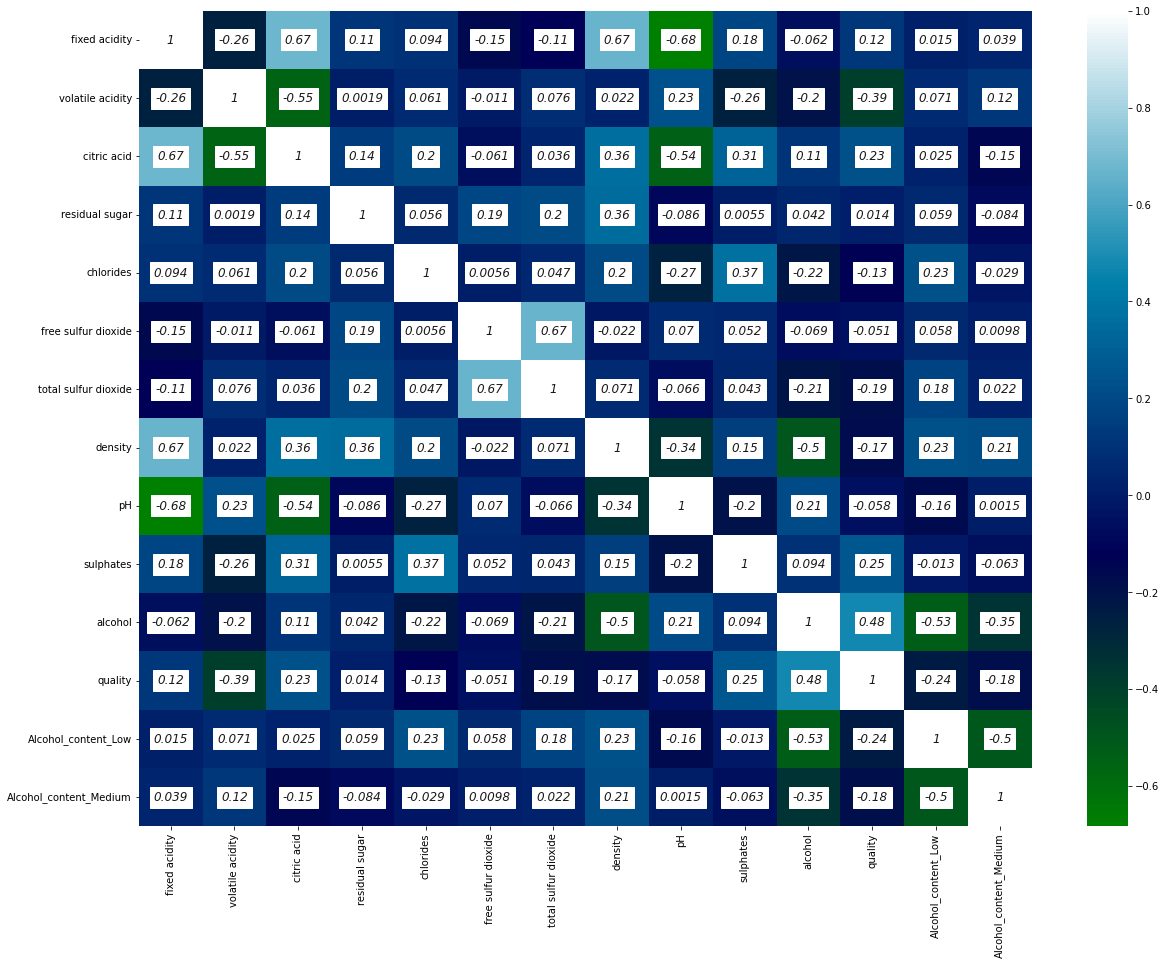

In [9]:
# Checking for Multicolinearity
plt.figure(figsize=(20,15))
annot_kws = {"fontsize":12,
            "fontstyle":"italic",
            'color':'k',
            'alpha':0.9,
            'verticalalignment':'center',
            "backgroundcolor":'w'}
sns.heatmap(data.corr(), cmap = "ocean",annot = True,annot_kws=annot_kws)
plt.show()

In [10]:
X = data.drop(['quality'], axis=1)
y = data['quality']

print(f" Shape of X : {X.shape}")
print(f" Shape of y : {y.shape}")

 Shape of X : (1599, 13)
 Shape of y : (1599,)


In [11]:
def correlation(dataset, threshold=0.60):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

In [12]:
corr_features = correlation(X)
print(corr_features)
print(len(corr_features))

{'total sulfur dioxide', 'density', 'pH', 'citric acid'}
4


In [13]:
X = X.drop(['total sulfur dioxide', 'pH', 'citric acid', 'density'], axis=1)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1111)

In [15]:
print(f" Shape of X_train : {X_train.shape}")
print(f" Shape of y_train : {y_train.shape}")
print(f" Shape of X_test : {X_test.shape}")
print(f" Shape of y_test : {y_test.shape}")

 Shape of X_train : (1279, 9)
 Shape of y_train : (1279,)
 Shape of X_test : (320, 9)
 Shape of y_test : (320,)


In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dtc.predict(X_test)

In [18]:
y_test[:20]

1557    6
1536    6
239     6
1056    7
144     6
1378    6
898     7
1029    7
1562    5
56      5
1021    6
677     5
309     6
1377    6
564     6
836     7
230     7
1107    7
103     5
1492    5
Name: quality, dtype: int64

In [19]:
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.58125

Avg Accuracy :(

In [20]:
# 2nd Method to multicolinearity
# Checking VIF Scores
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Alcohol_content_Low,Alcohol_content_Medium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [21]:
X = data.drop(['quality'], axis=1)
y = data['quality']

print(f" Shape of X : {X.shape}")
print(f" Shape of y : {y.shape}")

 Shape of X : (1599, 13)
 Shape of y : (1599,)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF SCORE'] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

In [24]:
vif.sort_values(by = 'VIF SCORE', ascending=False)

,variables,VIF SCORE
7,density,1872.06
8,pH,1077.34
10,alcohol,441.76
0,fixed acidity,75.93
9,sulphates,21.61
1,volatile acidity,17.08
2,citric acid,9.34
12,Alcohol_content_Medium,9.04
4,chlorides,6.61
6,total sulfur dioxide,6.55


In [25]:
col_to_drop = vif['variables'][vif['VIF SCORE']>20].values
col_to_drop

array(['fixed acidity', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [26]:
X.drop(['fixed acidity', 'density', 'pH', 'sulphates', 'alcohol', 'volatile acidity'], axis=1,inplace=True)
X.shape

(1599, 7)

In [27]:
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF SCORE'] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

In [28]:
vif

,variables,VIF SCORE
0,citric acid,2.91
1,residual sugar,3.87
2,chlorides,4.30
3,free sulfur dioxide,5.72
4,total sulfur dioxide,5.84
5,Alcohol_content_Low,1.79
6,Alcohol_content_Medium,2.42


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1111)

In [30]:
print(f" Shape of X_train : {X_train.shape}")
print(f" Shape of y_train : {y_train.shape}")
print(f" Shape of X_test : {X_test.shape}")
print(f" Shape of y_test : {y_test.shape}")

 Shape of X_train : (1279, 7)
 Shape of y_train : (1279,)
 Shape of X_test : (320, 7)
 Shape of y_test : (320,)


In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dtc.predict(X_test)
y_pred

array([6, 5, 6, 7, 6, 6, 7, 7, 5, 6, 6, 5, 5, 5, 7, 7, 5, 7, 5, 5, 5, 6,
       6, 7, 6, 7, 7, 5, 5, 5, 7, 6, 7, 7, 6, 7, 5, 6, 5, 6, 6, 6, 6, 7,
       6, 5, 5, 5, 5, 6, 5, 8, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 7, 5, 6, 6,
       7, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 4, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 8, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 7, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 5, 5,
       7, 6, 8, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 8, 6, 5,
       5, 6, 6, 5, 5, 5, 4, 7, 6, 5, 6, 6, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5,
       6, 5, 6, 6, 7, 5, 6, 7, 5, 6, 5, 5, 7, 7, 6, 6, 4, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 8, 5, 7, 6, 6, 6, 5, 4, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 5, 7, 4, 5, 6, 6, 6, 7, 6, 4, 5, 5, 7, 5, 4,
       7, 6, 4, 6, 6, 6, 5, 5, 6, 4, 6, 6, 5, 5, 5, 7, 7, 6, 5, 7, 6, 7,
       5, 5, 6, 7, 5, 5, 6, 6, 5, 7, 5, 6, 7, 5, 7,

In [33]:
y_test[:20]

1557    6
1536    6
239     6
1056    7
144     6
1378    6
898     7
1029    7
1562    5
56      5
1021    6
677     5
309     6
1377    6
564     6
836     7
230     7
1107    7
103     5
1492    5
Name: quality, dtype: int64

In [34]:
acc_score = accuracy_score(y_test,y_pred)
print(f"Accuracy score is: {round(acc_score*100,2)}%")

Accuracy score is: 60.62%


In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  4,  4,  1,  1],
       [ 0,  5, 92, 27,  6,  1],
       [ 0,  3, 28, 76, 14,  3],
       [ 0,  0,  6, 17, 25,  2],
       [ 0,  0,  1,  2,  0,  0]], dtype=int64)

In [36]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.09      0.10        11
           5       0.70      0.70      0.70       131
           6       0.60      0.61      0.61       124
           7       0.53      0.50      0.52        50
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.61      0.61      0.61       320



In [37]:
import graphviz
import pydotplus
from sklearn import tree

In [38]:
dot_data = tree.export_graphviz(dtc,
                                feature_names=X.columns,
                                class_names=[str(cls) for cls in y.unique()],
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
Image(graph.create_png())

InvocationException: GraphViz's executables not found

[Text(0.7247593324879406, 0.9807692307692307, 'x[4] <= 81.5\ngini = 0.639\nsamples = 1279\nvalue = [9, 42, 550, 514, 149, 15]'),
 Text(0.5277990356440148, 0.9423076923076923, 'x[0] <= 0.295\ngini = 0.647\nsamples = 1078\nvalue = [9, 38, 403, 476, 139, 13]'),
 Text(0.31390693098633266, 0.9038461538461539, 'x[5] <= 0.5\ngini = 0.6\nsamples = 594\nvalue = [6.0, 32.0, 280.0, 247.0, 28.0, 1.0]'),
 Text(0.17780751491558414, 0.8653846153846154, 'x[6] <= 0.5\ngini = 0.611\nsamples = 472\nvalue = [6, 24, 203, 210, 28, 1]'),
 Text(0.0653323742224855, 0.8269230769230769, 'x[3] <= 10.5\ngini = 0.594\nsamples = 124\nvalue = [0, 9, 28, 72, 14, 1]'),
 Text(0.045021791562645457, 0.7884615384615384, 'x[0] <= 0.165\ngini = 0.711\nsamples = 42\nvalue = [0, 5, 15, 14, 8, 0]'),
 Text(0.03588202936571743, 0.75, 'x[0] <= 0.085\ngini = 0.703\nsamples = 31\nvalue = [0, 4, 6, 13, 8, 0]'),
 Text(0.025726738035797402, 0.7115384615384616, 'x[0] <= 0.035\ngini = 0.708\nsamples = 24\nvalue = [0, 2, 6, 8, 8, 0]'),
 T

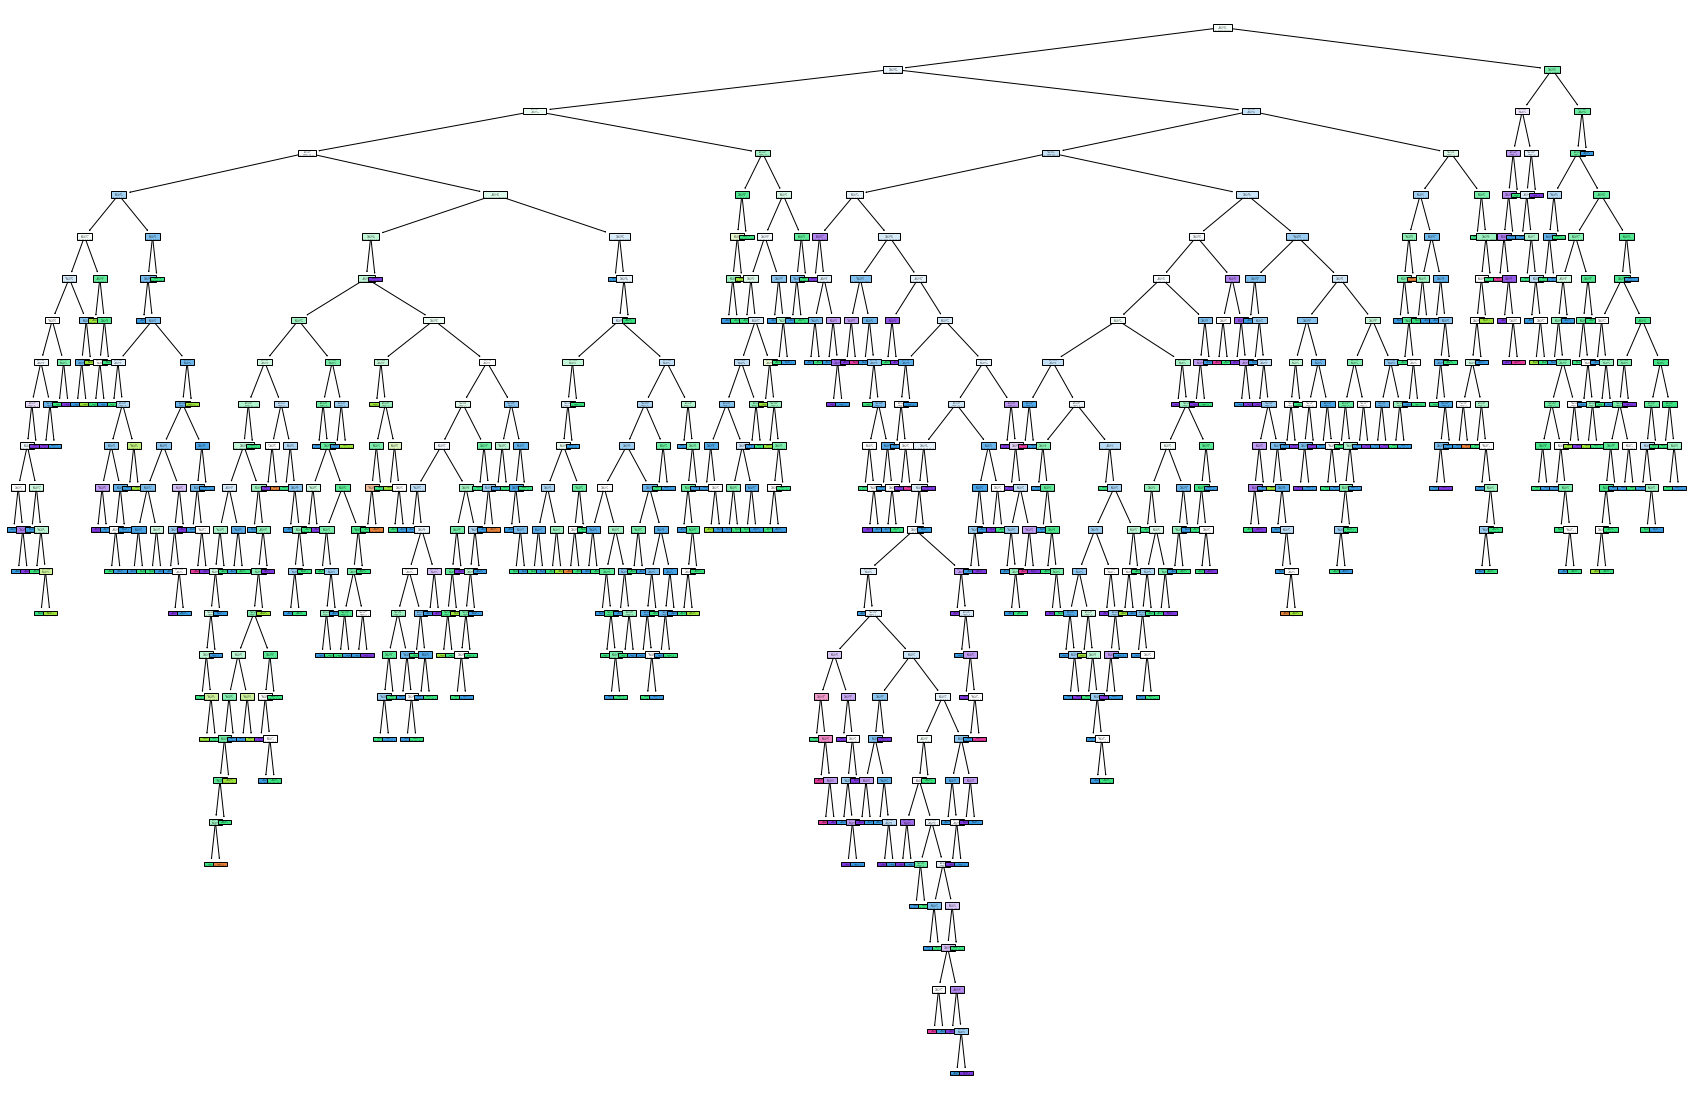

In [40]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtc, filled=True)